## Rozwiązywanie równań i układów równań

### Przykład 1. Użycie funkcji: fsolve

Rozwiązać równanie: $2.5 = \sqrt{x}$ 
inaczej mówiąc, znaleźć miejsce (lub miejsca) zerowe funkcji: $2.5 - \sqrt{x} = 0$.


In [3]:
from scipy.optimize import fsolve # potrzebna funkcja fsolve
import numpy as np

guess = 8 # wartość szacunkowa, startowa do poszukiwać rozwiązania

def f(x):
    return 2.5 - np.sqrt(x)

x0, = fsolve(f, guess)
print("Wynik: {0:.2f}".format(x0))

Wynik: 6.25


Graficzne przedstawienie rozwiązania:

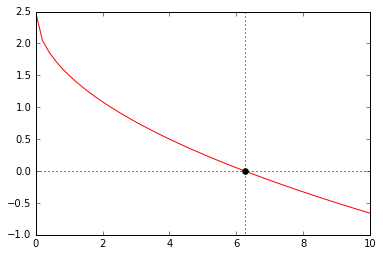

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10)

#przebieg funkcji f(x)
plt.plot( x, f(x), 'r-')

#znacznik w punkcie (x0,0) - rozwiązanie
plt.plot( x0, 0, 'ko')

#linie pomocnicze
plt.plot((0,10), (0,0), 'k:')
plt.plot((x0,x0), (2.5,-1.0), 'k:')



Czyli $\sqrt{x} = 2.5$ dla x = 6.25:

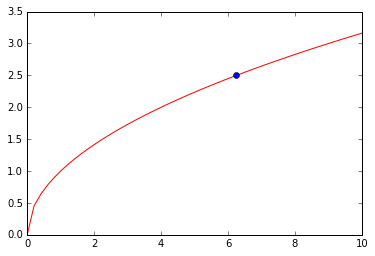

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10)

#przebieg funkcji f(x)
plt.plot( x, np.sqrt(x), 'r-')

plt.plot (x0,2.5,'o')

** Ćwiczenie 1. **

Rozwiąż równie: $ x^2 + 4x = -3 $. Podać oba rozwiązania.

** Ćwiczenie 2. **

Sporządzić wykres funkcji: $0.5(x-2)^2=10$ i znaleść rozwiązanie (rozwiązania) tego równania (Podpowiedź: wartość guess).

** Ćwiczenie 3. **

Rozwiązać równanie:
$$ \frac{x^2}{(10-0.5x)(30-1.5x)^3}  $$

Rozwiązań szukać w przedziale 0-30.

### Rozwiązywanie układów równań

### Przykład 2. Funkcja linalg.solve

Rozwiązać układ równań liniowych:
\begin{cases}
x_1 + x_2 + x_3 = 10 \\
0.04x_1 + 0.54x_2 + 0.26x_3 = 2 \\
0.93x_1 + 0.24x_2 + 0x_3 = 6
\end{cases}

In [25]:
import numpy as np

# współczynniki "przy x"
a = np.array([[1,1,1], [0.04,0.54,0.26], [0.93, 0.24, 0]])
# wyrazy wolne
b = np.array([10,2,6])
# 
x = np.linalg.solve(a,b)
print "Rozwiązanie:"
print(x)

Rozwiązanie:
[ 5.82375479  2.43295019  1.74329502]


### Przykład 3. Funkcja fsolve

Rozwiązać układ równań nieliniowych:
\begin{cases}
y=x^2\\
y=8-x^2
\end{cases}

In [29]:
from scipy.optimize import fsolve

def objective(X):
    x,y = X
    eq1 = y - x**2
    eq2 = y - 8 + x**2
    return [eq1, eq2]

x0 = 1
y0 = 1
guess = [x0, y0]
x1,y1 = fsolve(objective, guess)
print("Rozwiązanie 1: %.2f %.2f" % (x1,y1))

x0 = -1
y0 = -1
guess = [x0, y0]
x2,y2 = fsolve(objective, guess)
print("Rozwiązanie 2: %.2f %.2f" % (x2,y2))


Rozwiązanie 1: 2.00 4.00
Rozwiązanie 2: -2.00 4.00


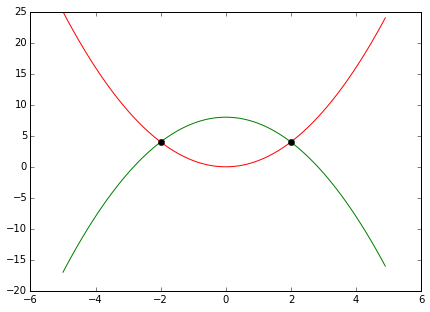

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#import matplotlib as mpl
#mpl.rcParams.update({'font.size': 14})

x = np.arange(-5.0, 5.0, 0.1)
plt.figure(figsize=(7,5))
plt.plot( x, x**2, 'r-')
plt.plot( x, 8-x**2, 'g-')
plt.plot( x1, y1, 'ko')
plt.plot( x2, y2, 'ko')


### Przykład 4. Mieszanina rozpuszczalników

Podać sposób otrzymania 1000L mieszaniny rozpuszczalników składającej się z acetonu i octanu etylu, tak aby ułamek molowy acetonu ($x_a$) wynosił 0.5.


In [45]:
#dane:

M_a = 58     #kg/kmol
ro_a = 791   #kg/m^3

M_oe = 88    #kg/kmol
ro_oe = 897  #kg/m^3

V_total = 1000

x_a = 0.5
x_oe = 1 - 0.5  # z definicji



def model(X):
    V_a, V_oe = X
    
    # przeliczenie objętości na ilości moli
    n_a = (ro_a*V_a)/M_a
    n_oe = (ro_oe*V_oe)/M_oe
        
    # bilans objętości (zał. brak kontrakcji)
    eq1 = V_a + V_oe - 1000
    
    # z definicji ułamak molowego
    eq2 = n_a/(n_oe+n_a) - x_a
    
    return [eq1, eq2]


V0_a = 100
V0_oe = 100
guess = [V0_a, V0_oe]

V_a, V_oe = fsolve(model, guess)
print("Rozwiązanie: V_a = {0:.2f}L  V_oe = {1:.2f}L".format(V_a, V_oe))


Rozwiązanie: V_a = 427.73L  V_oe = 572.27L


Sprawdzenie obliczeń:

In [46]:
V_a + V_oe

1000.0000000000001

** Ćwiczenie 2. **

Podać sposób otrzymania 1000L mieszaniny rozpuszczalników składającej się z acetonu, octanu etylu i metanolu, tak aby ułamek molowy acetonu ($x_a$) i metanolu ($x_m$) wynosił odpowiednio: 0.5 i 0.2.